# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
#so that warnings don't pop up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#required libraries for performing activity on dataset

# UNDERSTANDING DATASET

In [3]:
previousapp_df = pd.read_csv(r"C:\Users\dhruv\Downloads\previous_application.csv")
application_df = pd.read_csv(r"C:\Users\dhruv\Downloads\application_data.csv")

In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
print(application_df.shape)

(307511, 122)


# DATA FILTERING

In [6]:
##Finding columns with missing values

application_df.count()
app_miss = application_df.isna()
app_miss.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#missing value percentage
miss_app = app_miss.sum()
miss_app
missing_df = miss_app/len(application_df)*100
missing_df.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

CHECKING DATA IMBALANCE

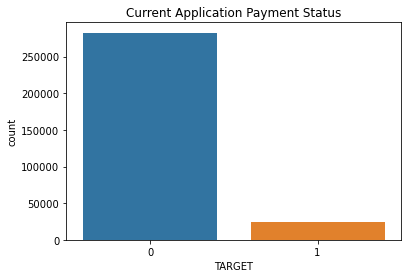

In [9]:
plt.title("Current Application Payment Status")
sns.countplot(application_df['TARGET'])
plt.show()

Data Imbalance Proportion

In [12]:
non_defaulter  = application_df[application_df["TARGET"] == 0]
defaulter  = application_df[application_df["TARGET"] == 1]

print(defaulter.shape[0])
print(non_defaulter.shape[0])
##let's find percentage of defaulters as well
print("Percentage:", defaulter.shape[0]*100/(defaulter.shape[0]+non_defaulter.shape[0]))
## since only 8% defaulters can be found in application datframe, it means data is highly imbalance

24825
282686
Percentage: 8.072881945686495


HOW ABOUT WE START WITH CHECKING HOUSING STATUS OF APPLICANTS

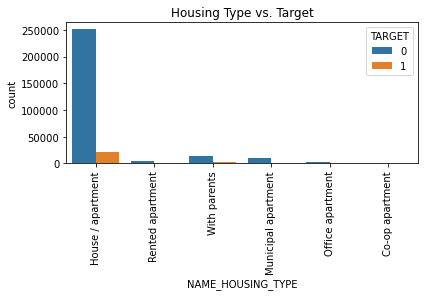

In [13]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [14]:
###this will help us finding percent of defaulter with respect to every value type
def valuewisedefaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        defaulter_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (defaulter_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [15]:
##so now if want to calculate the percentage housing type wise we can do it
valuewisedefaulter_percentage(application_df, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


In [16]:
##most number of defaulters are living in rented apartment or with their parents

Let's check client's working and permanent address region and city wise

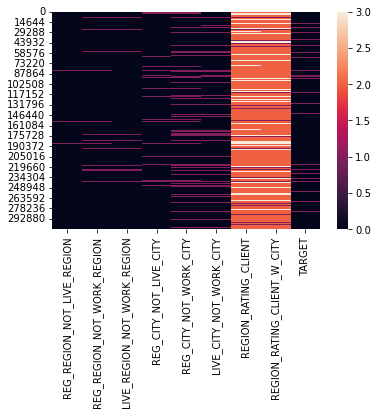

In [18]:
starting_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
ending_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')
reg_df = application_df.iloc[:, starting_idx:ending_idx+1]
reg_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
reg_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
reg_df["TARGET"] = application_df["TARGET"]
sns.heatmap(reg_df)
plt.show()

In [19]:
##REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
##REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed

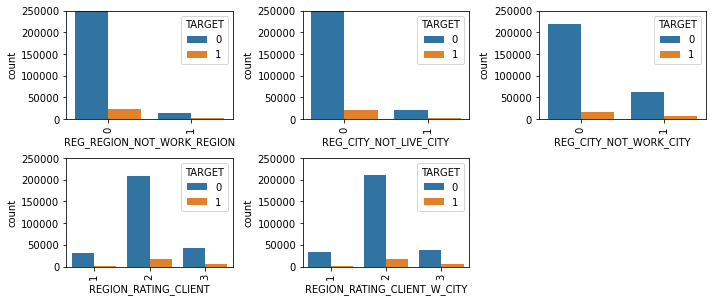

In [20]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [21]:
##Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
##Highest Applicants have Region rating of 2

Lets check there assests

In [27]:
application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


In [23]:
valuewisedefaulter_percentage(application_df, 'FLAG_OWN_CAR')
##those who don't own a car is slighlty much defaulter than those who own

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.24373


In [30]:
valuewisedefaulter_percentage(application_df, 'FLAG_OWN_REALTY')
##those who don't own realty is slighlty much defaulter than those who own

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


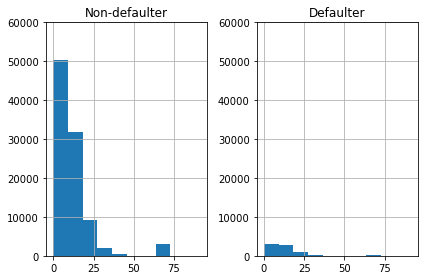

In [33]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_defaulter['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
defaulter['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

In [34]:
##both have similar range of value Age= 0-25 so they can be dropped

Family Information

In [35]:
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [36]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS
application_df = application_df.dropna(subset=['CNT_FAM_MEMBERS']) 
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [37]:
# Since number of family member cannot have float dtype converting to Integer
application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)
application_df[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


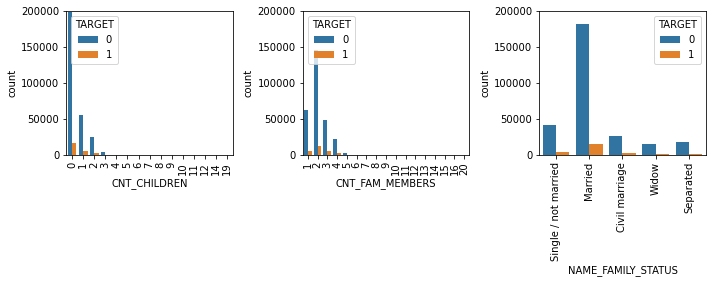

In [38]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [39]:
application_df.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [40]:
valuewisedefaulter_percentage(application_df, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.0
10,13.0,100.0
9,10.0,33.333333
8,8.0,30.0
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.76029
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [41]:
valuewisedefaulter_percentage(application_df, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [42]:
##Default rate is highest for Civil Marriage and Single applicants
##Most of the applicants are married or have no children or have 2 family members.
##Applicants with relatively more number of children or family members have higher default percentage.

# Education type

In [43]:
valuewisedefaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


In [44]:
##people having lower secondary education are more likely to be defaulter

OCCUPATION

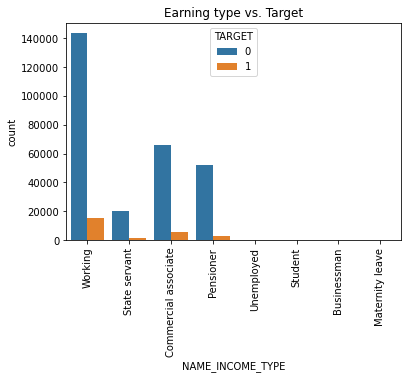

In [45]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Earning type vs. Target")
plt.show()

In [46]:
valuewisedefaulter_percentage(application_df,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.0
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.0
6,Businessman,0.0


In [47]:
application_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [49]:
##Most of the applicants are working.
##Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter

OCCUPATION TYPE

In [50]:
application_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [51]:
application_df['OCCUPATION_TYPE'].fillna("NA", inplace=True) ##filling empty value with NA

In [52]:
valuewisedefaulter_percentage(application_df, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.32613
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.57877
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


In [53]:
##Low-skill labourers are most likely to be defaulter

# Gender

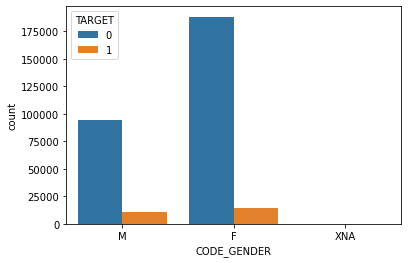

In [54]:
sns.countplot(application_df['CODE_GENDER'], hue=application_df["TARGET"])
plt.show()

In [55]:
##most applicants are female

In [56]:
##Have to convert column DAYS_BIRTH to Age
application_df["Age"] = application_df.DAYS_BIRTH//(-365.25) 
application_df[["Age"]].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [57]:
##So now can drop column DAYS_BIRTH because we have Age column
application_df.drop("DAYS_BIRTH", inplace=True, axis=1)

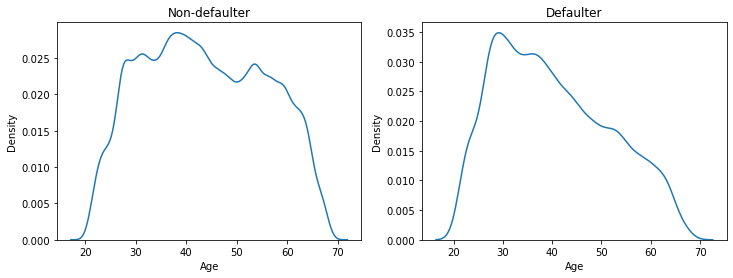

In [59]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

In [60]:
##People that are 30years old have higher default rate and default cases are less for applicants more than 40 years old.

# INCOME AND ANNUITY COLUMN

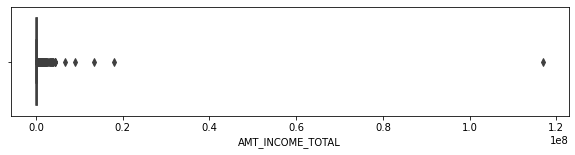

In [61]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()

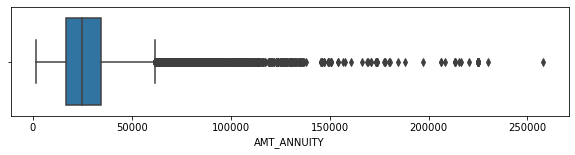

In [62]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [63]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_INCOMRE_TOTAL

application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]
application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'], 99)]

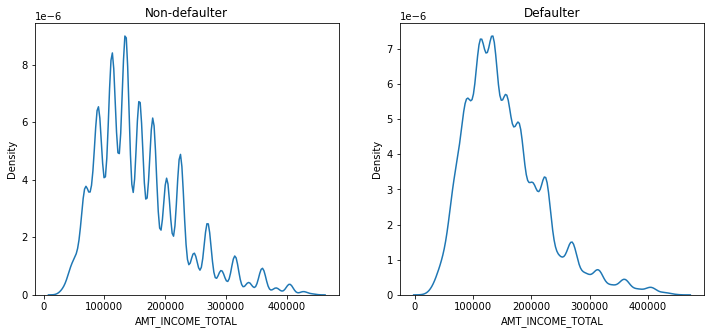

In [65]:
##for income
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

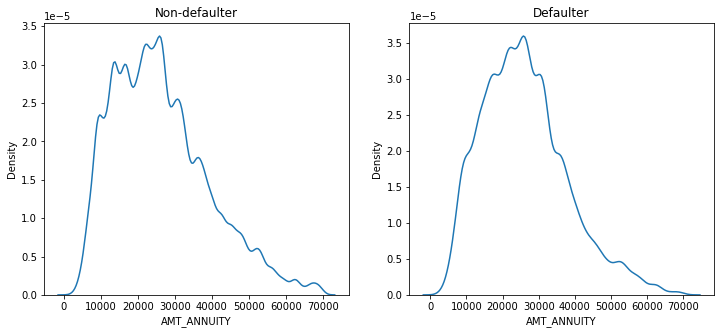

In [66]:
##for annuity
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

In [67]:
##in annuity for defaulter and non-defaulter data is all most similar unlike income section